In [112]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import TruncatedSVD

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df1 = pd.read_csv('data/both_vectors.csv')

In [18]:
allvec = df1
id_vec = df1[df1.columns[0:3]]
text_vec = df1[df1.columns[3:303]]
image_vec = df1[df1.columns[303:4398]]

# Data Preparation

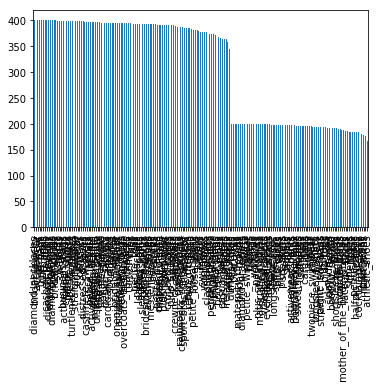

In [26]:
id_vec.category.value_counts().plot.bar()

In [66]:
values = id_vec.category.value_counts()
keeplist = values[values < 300].index

### Now we have balanced original categories.
14,737 items from 76 categories


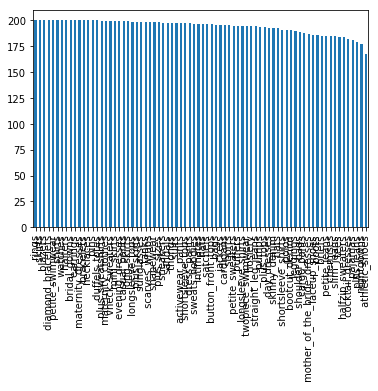

In [75]:
df = df1[df1['category'].isin(keeplist)]
df.category.value_counts().plot.bar()

### Check if features are isotropic (they should have similar variances)

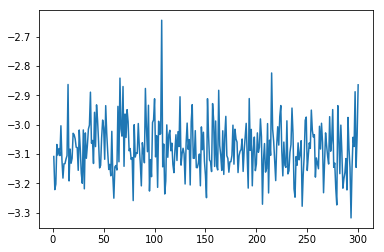

In [79]:
# Text isotropy - original
plt.plot(np.log(np.std(text_vec, axis=0)))

/Users/janelleszary/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


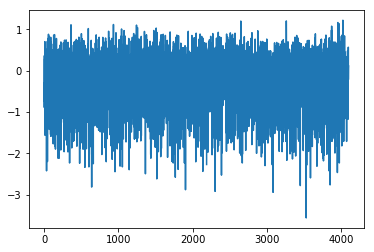

In [80]:
# Image isotropy - original
plt.plot(np.log(np.std(image_vec, axis=0)))

### There are a ton of zeros in image data. Dimensionality reduction using truncatedSVD

In [113]:
svd = TruncatedSVD(n_components=300, n_iter=7, random_state=0)
image_vec_tsvd = svd.fit_transform(image_vec)
image_vec_tsvd = pd.DataFrame(image_vec_tsvd)

### Normalize

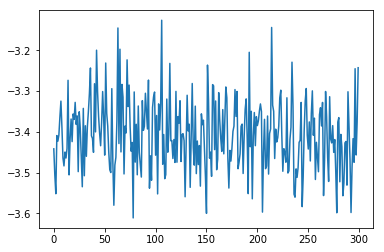

In [87]:
tx = text_vec.values #returns a numpy array

text_normalized = preprocessing.normalize(tx, norm='l2')

plt.plot(np.log(np.std(text_normalized, axis=0)))

In [134]:
text_normalized = pd.DataFrame(text_normalized)

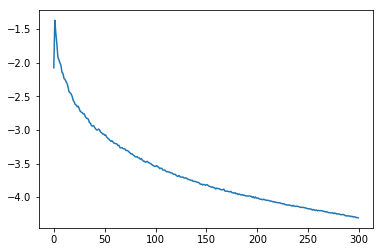

In [128]:
ix = image_vec_tsvd.values #returns a numpy array
image_normalized = preprocessing.normalize(ix, norm='l2')
plt.plot(np.log(np.std(image_normalized, axis=0)))

allx = df[df.columns[3:4398]].values
all_normalized = preprocessing.normalize(allx, norm='l2')

plt.plot(np.log(np.std(all_normalized, axis=0)))

In [135]:
image_normalized = pd.DataFrame(image_normalized)

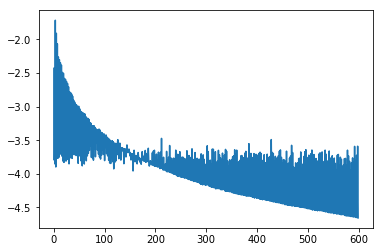

In [137]:
alldata = pd.concat([id_vec, text_normalized, image_normalized], axis=1)
ax = alldata[alldata.columns[3:303]].values #returns a numpy array
all_normalized = preprocessing.normalize(ax, norm='l2')
plt.plot(np.log(np.std(all_normalized, axis=0)))
all_normalized = pd.DataFrame(all_normalized)

# Clustering

Decide how many clusters we want to use

Starting with 15 (arbitrarily) 

Use elbow method later

### Text Vectors

(array([  5867.,   2450.,  11706.,   3225.,   4613.,   8851.,   1838.,
          7584.,   3218.,   7901.]),
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ]),
 <a list of 10 Patch objects>)

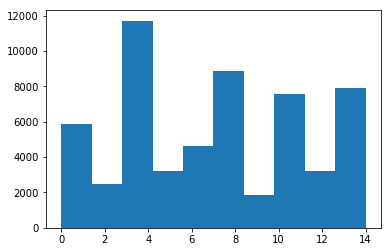

In [96]:
kmeans_text = KMeans(n_clusters=15, random_state=0).fit(text_normalized)
pred_text = kmeans_text.labels_

# We need to embed into 2d space first
# y_text = pred_text
# cs_text = pd.factorize(y_text)
# plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.prism(cs_text[0]))
plt.hist(pred_text)

### Image Vectors

(array([  8195.,   3093.,   6370.,   4184.,   1575.,  11471.,   4531.,
          8646.,   1452.,   7736.]),
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ]),
 <a list of 10 Patch objects>)

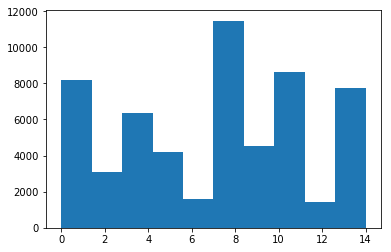

In [138]:
kmeans_text = KMeans(n_clusters=15, random_state=0).fit(image_normalized)
pred_text = kmeans_text.labels_
plt.hist(pred_text)

### Text + Image Vectors

(array([ 9505.,  4164.,  5651.,  4398.,  4744.,  6074.,  4603.,  6345.,
         3167.,  8602.]),
 array([  0. ,   1.4,   2.8,   4.2,   5.6,   7. ,   8.4,   9.8,  11.2,
         12.6,  14. ]),
 <a list of 10 Patch objects>)

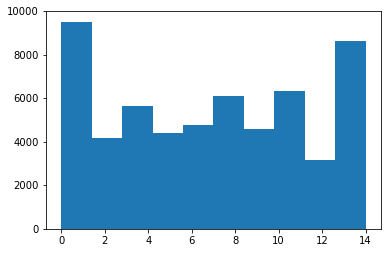

In [139]:
kmeans_all = KMeans(n_clusters=15, random_state=0).fit(all_normalized)
pred_all = kmeans_all.labels_
plt.hist(pred_all)